# Binary Classification using Logistic Regression  (Blob)

In [29]:
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

## Sample blobs

### Geneation

In [30]:
x, y = make_blobs(n_samples=1000, n_features=2
                  , centers=[[1,1], [1.5,1.5]], cluster_std=0.5)

In [32]:
x.shape

(1000, 2)

### Visualization for blobs
check the sample blobs using graph

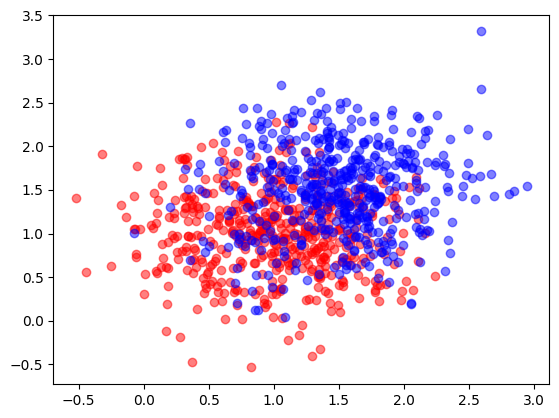

In [34]:
color = ['red', 'blue']

for  i in [0, 1]:
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color[i], alpha=0.5)
plt.show()

## Split blobs dataset

training set, test set

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [36]:
print(x_train.shape)
print(x_test.shape)

(750, 2)
(250, 2)


## Try #1 (using LogisticRegression())

### Training

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### Test

In [38]:
y_hat = model.predict(x_test)

In [39]:
y_hat

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0])

### Visualization

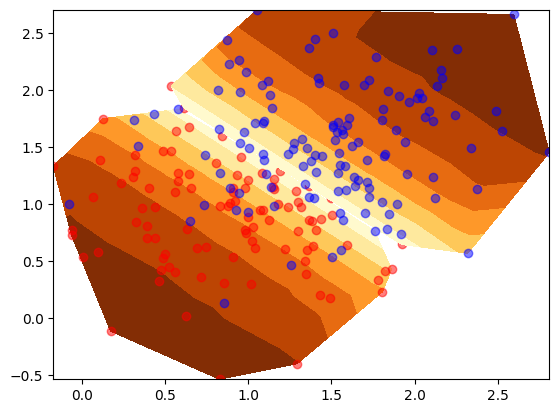

In [40]:
y_hat_log = model.predict_proba(x_test)

for  i in [0, 1]:
    idx = np.where(y_hat==i)
    cs = plt.tricontourf(x_test[idx, 0].reshape(-1,),
                         x_test[idx, 1].reshape(-1,),
                         y_hat_log[idx, i].reshape(-1,),
                         cmap='YlOrBr')
    idx = np.where(y_test==i)
    plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color[i], alpha=0.5)

plt.show()


### Accuracy

In [41]:
acc = (y_hat == y_test).mean()
print(f'acc={acc}')

acc=0.776


## Try #2

In [43]:
def bce_loss(W, args):
  X = args[0]
  y = args[1]
  trc = args[2]

  y_hat = 1.0 / (1 + np.exp(-X @ W))
  bce = -y * np.log(y_hat + 1e-8) - (1.0 - y) * np.log(1.0 - y_hat + 1e-8)
  loss = bce.mean()

  return loss

x_train_with_b = np.hstack([x_train, np.ones([x_train.shape[0], 1])])
result = optimize.minimize(fun = bce_loss, x0 = [0,0,0], args=[x_train_with_b, y_train, True])

### Visualization

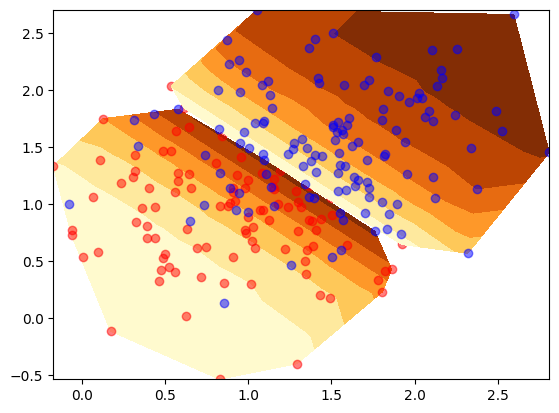

In [44]:
W = result.x
x_test_with_b = np.hstack([x_test, np.ones([x_test.shape[0], 1])])
y_hat = 1.0 / (1.0 + np.exp(-x_test_with_b @ W))
y_hat_cls = (y_hat > 0.5).astype('int8')

for  i in [0, 1]:
    idx = np.where(y_hat_cls==i)
    cs = plt.tricontourf(x_test[idx, 0].reshape(-1,),
                         x_test[idx, 1].reshape(-1,),
                         y_hat[idx].reshape(-1,),
                         cmap='YlOrBr')
    idx = np.where(y_test==i)
    plt.scatter(x_test[idx, 0], x_test[idx, 1], c=color[i], alpha=0.5)

plt.show()

### Accuracy

In [45]:
x_test_with_b = np.hstack([x_test, np.ones([x_test.shape[0], 1])])
y_hat = 1.0 / (1 + np.exp(-x_test_with_b @ W))
y_hat = (y_hat > 0.5).astype('int8')

acc = (y_hat == y_test).mean()
print(f'acc={acc}')

acc=0.776


## Evaluation

### Confusion Matrix

[[100  26]
 [ 30  94]]


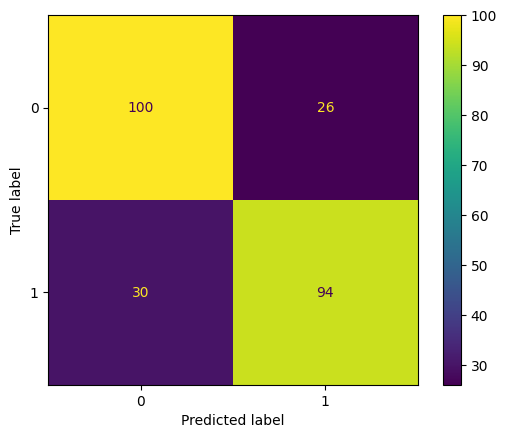

In [47]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

con_max = confusion_matrix(y_true=y_test,
                           y_pred=y_hat,
                           labels=[1,0])

tn, fp, fn, tp = con_max.flatten()
print(con_max)

disp = ConfusionMatrixDisplay(confusion_matrix=con_max)
disp.plot()
plt.show()

### Precision Recall Curve

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


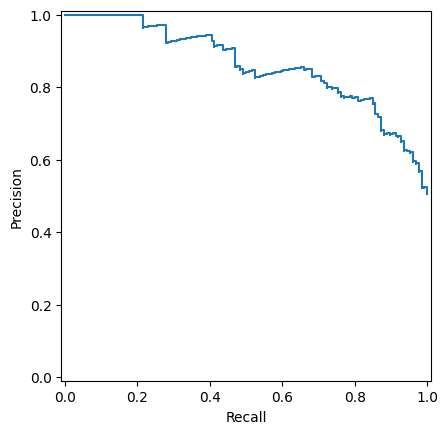

In [48]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

pr, rc, plt.thetagrid = precision_recall_curve(y_true=y_test,
                                            probas_pred=y_hat_log[:,1])
disp = PrecisionRecallDisplay(precision=pr, recall=rc)
disp.plot()

plt.show()